In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
matplotlib.style.use('fivethirtyeight')
sns.set_style("whitegrid")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

On the cutting edge of ML the technologies are far beyond my scope however, from self driving cars, to facial recognition, to speech to text, we are only beginning to tap into the resource that machines can assist us with the making everyday human life easier. This cutting edge has been buold from a few basic principles to what they are today, below I will introduce you to a few of these topics and attempt to explain them given my understanding of them. 


## Linear Regression
***

Linear regression is a form of predictive modelling, used to make predictions based on patterns in exisiting data, predictive modelling iteslf is a form of Machine learning (ML). "Regression" is in reference to any modelling that is related to real number prediction, in contrast to prediciting a categoric or class variable, which is called classification. As the name states linear regression is about fitting a line, or best fit line to a series or collection of data-points, therefore we can reduce the formula for the line down to our mathematical standard: 
<center>$y = mx + c$</center>
While the above applies to a straight line only, we will just begin our explanation at this point. The model aims to fit a line to the minimum vertical distance from the data points to the regression line. Lets take a look at a visualisation in order to see the model at work, I have chosen the "mtcars" dataset, which is loaded from file, however the online link is also avaialbe in the references below[2][3]:

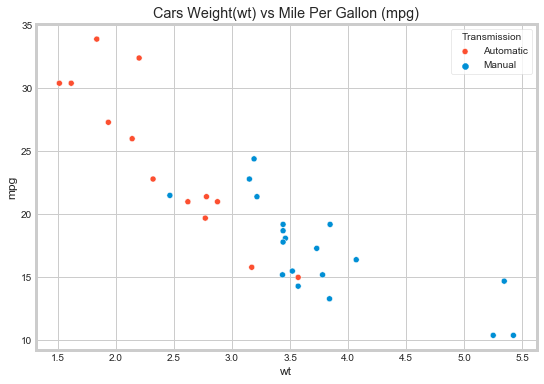

In [2]:
## Load in the dataset, found: https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv
mtcars = pd.read_csv("datasets/mtcars.csv")

## scatter plot of datapoints of weight and mpg with a hue of manual or automatic transmission
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.legend(title='Transmission', loc='upper right', labels=['Automatic', 'Manual']);

From observing the data of weight vs miles per gallon, we can see there appears to be a somewhat linear relationship between these two factors. For my own curisostiy I thought I'd see what the difference between automatic and manual was in the dataset, it really added an extra dynamic to the visuals for the data, so I left it in. Let's see what sort of a line our linear regression comes up with then ran on the dataset, we weill use Sklearn's linear regression model. 

In [3]:
# create model
regression_model = linear_model.LinearRegression()

# Train model
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), y = mtcars["mpg"])

intercept = regression_model.intercept_
coefficient = float(regression_model.coef_)

print(f"Model y-intercept {intercept:.6f}, model coefficients {coefficient:.6f}")

Model y-intercept 37.285126, model coefficients -5.344472


The output provides our y-intecept value, ie when x = 0, y will = 37.28, the coefficient is the slope of the line. We therefore have our best-fit line equation for the comparison of car weight vs fuel consumption:
<center>$y = -5.344x + 37.285$</center>

We could plot the line as per the below, however, there are are  more accurate and far easier methods to graphically diplaying out line, all the while using the utility of our module.

In [4]:
x1 = mtcars["wt"]
y1 = -5.344*x1 + 37.285

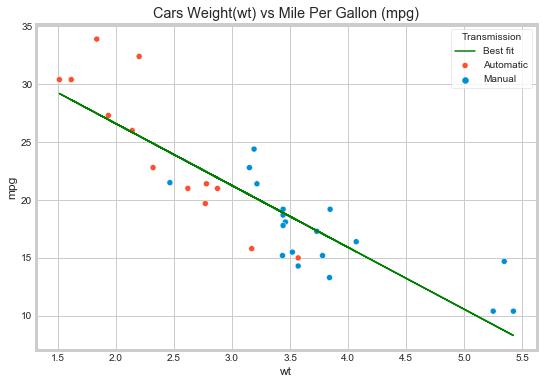

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.plot(x1, y1, 'g-', linewidth=1.5)
plt.legend(title='Transmission', loc='upper right', labels=['Best fit','Automatic', 'Manual']);


We can look at the score[4], which is the coefficient of determination, or $R^2$, ranging from 0 to 1 with 1 being the best. It describes the proportion of vairance in the reponse variable that is explained by the model[5]. The differences between the predicted and actual points is what the R-squared measure is based on. Called residuals, they can be extracted by making predcitons, and then taking away the actual value from the prediction. Which I will do below. 

In [6]:
#Get the score of the model
mtcar_reg_score = regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])
print(f"The model's R-squared score is: {mtcar_reg_score:.6f}")

The model's R-squared score is: 0.752833


In [7]:
#Train and predict the results, extracting the residuals

train_pred = regression_model.predict(X= pd.DataFrame(mtcars["wt"]))

residual = mtcars["mpg"] - train_pred

residual.describe()

count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

$R^2$ in theScikit-learn documentaion is defined as[6]:
<center>$(1 - \frac{u}{v})$</center>
 <center>"where $u$ is the residual sum of squares ((y_true - y_pred)** 2).sum() and $v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()."</center>
 So we need to square and sum our residual values (reidual above), and the sum of the squares of the difference between each datapoint and the data's mean (our acutal values).

In [8]:
pred_residuals = (residual**2).sum()

real_total = ((mtcars['mpg'] - mtcars['mpg'].mean())**2).sum()

r_square = (1-(pred_residuals/real_total))

print(f"The model's R-squared score is: {r_square:.6f}")

The model's R-squared score is: 0.752833


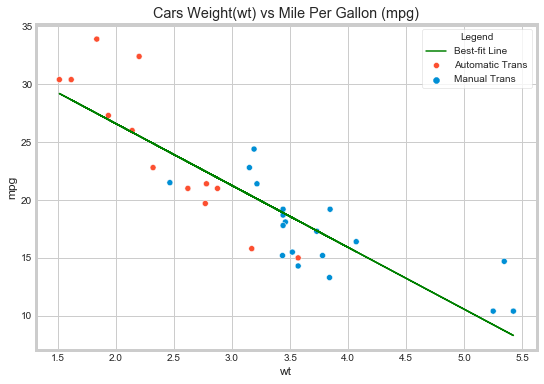

In [9]:
# Adding best-fit line as per the below
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.plot(mtcars["wt"], train_pred, 'g-', linewidth=1.5)
plt.legend(title='Legend', loc='upper right', labels=['Best-fit Line','Automatic Trans', 'Manual Trans']);

It is important to note that the data should be checked for outliers, and processed to remove any that have a large influence on the regression.
Further while the relationship of weight and mpg may seem to be linear in nature, a striaght line may not be the best manner to fit in all cases, we can test this simply by creating a probability plot, we do this by importing stats.probplot() from the scipy.stats library.

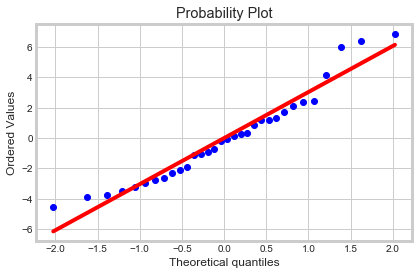

In [10]:
stats.probplot(residual, dist="norm", plot=plt)
plt.show();

Deviations from the straight line here suggest departures from normality. At both ends the points seem to taper off the line in opposite directions, there could be many, many reasons for this. however, with s slightly emergent "S" shape could indicate a binomial distribution.[7]

Once we have made our predictions, it is essential practice to  see how the model performed, it's all well and good making models to predict the weather, but in order to have any use they must be accurate. One method of doing so is the Root Mean Squared Error[8]. This is a rick function, that determines the root of the average squared difference betweem the predicted and the actual value of a feature or variable. We will use Sklearn's function for the mean square error and raise it to the power of 0.5 for the root.
The best possible score is 0.00, with a score of less than 180 being adjudged to be good or moderate.[9]

In [11]:
RMSE = mean_squared_error(train_pred, mtcars["mpg"])**0.5
print(f"The RMSE of the mtcars model is: {RMSE:.6f}")

The RMSE of the mtcars model is: 2.949163


### Polynomial Regression
***

Linear Regression does not stop at simple straight line fits, it can handle much more complex structures. If our data displays less linear relationships, our linear model can be adapted by fitting a curved line. This style of linear regression is called polynomial regression. Let's see if we can get a better RMSE score on a polynomial fit. We will do pretty much the exact same as before, except we will include the cars weight squared in the argument for X when fittign the model.

In [19]:
# initialise model
polynom_model = linear_model.LinearRegression()

# add data with squared values
poly_df = pd.DataFrame([mtcars['wt'], mtcars["wt"]**2]).T

# fit the model
polynom_model.fit(X = poly_df, 
               y = mtcars["mpg"])

poly_intercept = regression_model.intercept_
poly_coefficient = float(regression_model.coef_)

#Get the score of the model
mtcar_poly_reg_score = polynom_model.score(X = poly_df,  y = mtcars["mpg"])
print(f"The model's R-squared score is: {mtcar_poly_reg_score:.6f}")

The model's R-squared score is: 0.819061


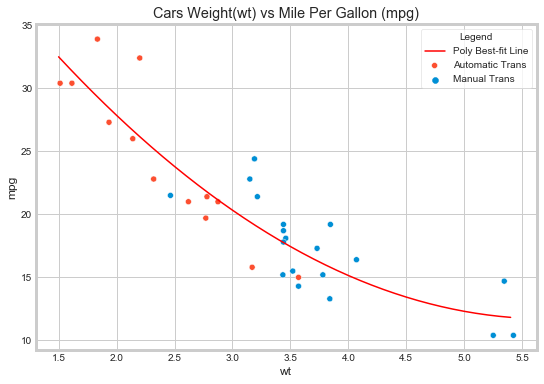

In [27]:
poly_line_range = np.arange(1.5, 5.5, 0.1)

poly_pred= pd.DataFrame([poly_line_range, poly_line_range**2]).T

poly_y_vals = polynom_model.predict(X = poly_pred)

# Adding best-fit line as per the below
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=mtcars, x="wt", y="mpg", hue = "am")
ax.set_title("Cars Weight(wt) vs Mile Per Gallon (mpg)")
plt.plot(poly_line_range, poly_y_vals, 'r-', linewidth=1.5)
plt.legend(title='Legend', loc='upper right', labels=['Poly Best-fit Line','Automatic Trans', 'Manual Trans']);

In [30]:
poly_predictions = polynom_model.predict(X=poly_df)

In [31]:
RMSE = mean_squared_error(poly_predictions, mtcars["mpg"])**0.5
print(f"The RMSE of the polynomial mtcars model is: {RMSE:.6f}")

The RMSE of the polynomial mtcars model is: 2.523300


References:
1. https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/least-squares-regression-line/ 
2. https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv 
3. https://cran.r-project.org/web/packages/explore/vignettes/explore_mtcars.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
5. https://www.kaggle.com/hamelg/python-for-data-27-linear-regression
6.https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
7. https://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
9. https://www.askpython.com/python/examples/rmse-root-mean-square-error
   